In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sap500.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0


In [3]:
df = pd.read_csv("sap500.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24488 entries, 1927-12-30 to 2025-06-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24488 non-null  float64
 1   High    24488 non-null  float64
 2   Low     24488 non-null  float64
 3   Close   24488 non-null  float64
 4   Volume  24488 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24488 entries, 1927-12-30 to 2025-06-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24488 non-null  float64
 1   High    24488 non-null  float64
 2   Low     24488 non-null  float64
 3   Close   24488 non-null  float64
 4   Volume  24488 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24488 entries, 1927-12-30 to 2025-06-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    24488 non-null  float64
 1   High    24488 non-null  float64
 2   Low     24488 non-null  float64
 3   Close   24488 non-null  float64
 4   Volume  24488 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

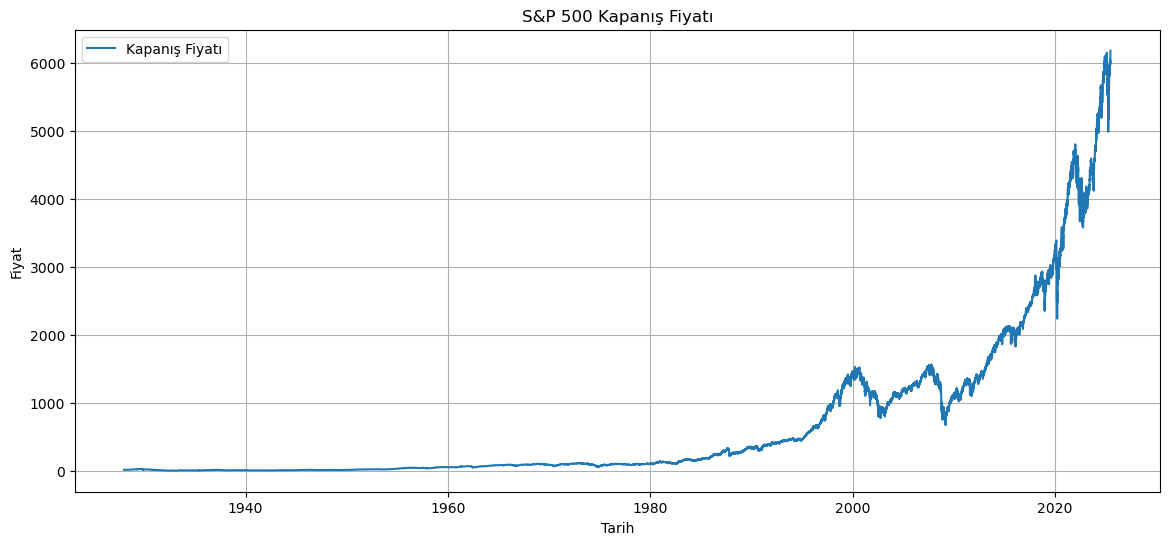

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Kapanış Fiyatı')
plt.title("S&P 500 Kapanış Fiyatı")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid()
plt.legend()
plt.show()

<Axes: title={'center': 'Hareketli Ortalamalar'}, xlabel='Date'>

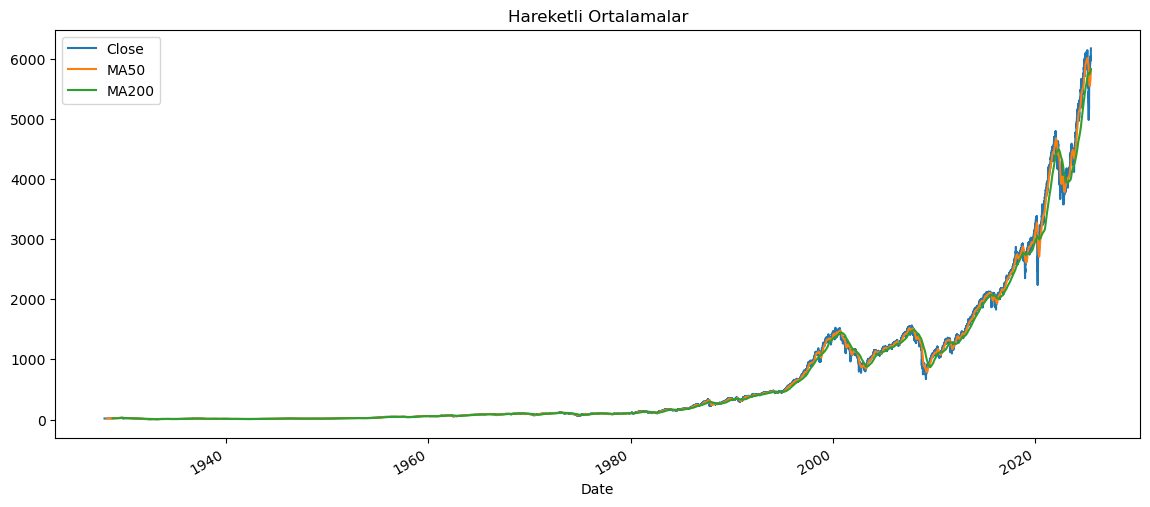

In [9]:
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

df[["Close", "MA50", "MA200"]].plot(figsize=(14,6), title="Hareketli Ortalamalar")

<Axes: title={'center': 'Günlük Getiri'}, xlabel='Date'>

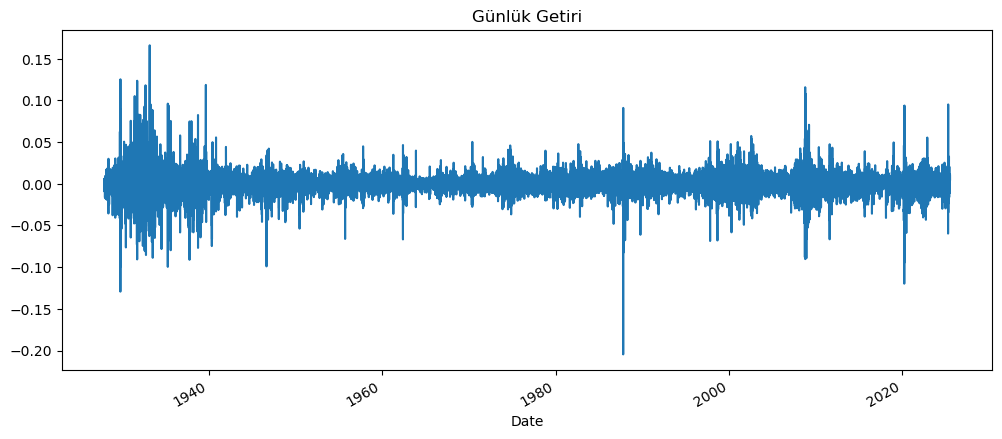

In [10]:
df["Daily Return"] = df["Close"].pct_change()
df["Daily Return"].plot(figsize=(12,5), title="Günlük Getiri")

<Axes: >

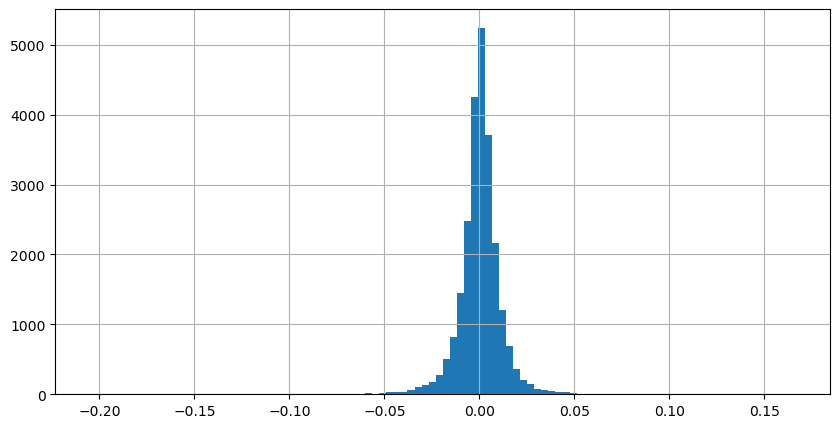

In [11]:
df["Daily Return"].hist(bins=100, figsize=(10,5))

<Axes: >

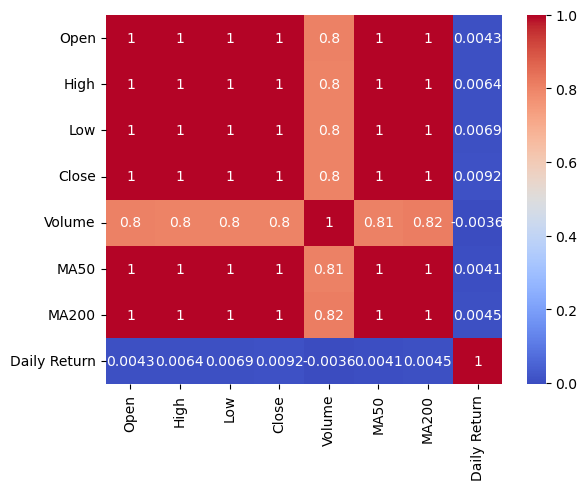

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: title={'center': '21 Günlük Volatilite'}, xlabel='Date'>

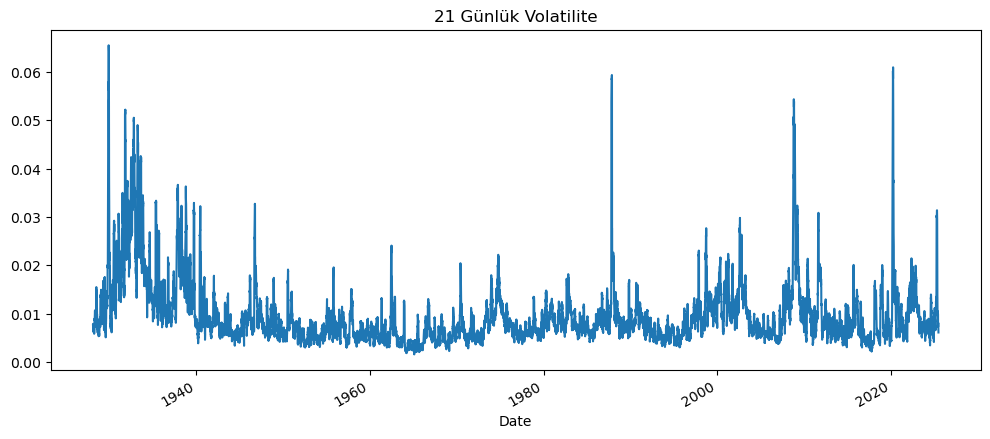

In [13]:
df["Volatility"] = df["Daily Return"].rolling(window=21).std()
df["Volatility"].plot(figsize=(12,5), title="21 Günlük Volatilite")

In [14]:
import numpy as np

In [16]:
df["MA20"] = df["Close"].rolling(window=20).mean()

In [17]:
df["BB_upper"] = df["MA20"] + 2 * df["Close"].rolling(window=20).std()
df["BB_lower"] = df["MA20"] - 2 * df["Close"].rolling(window=20).std()

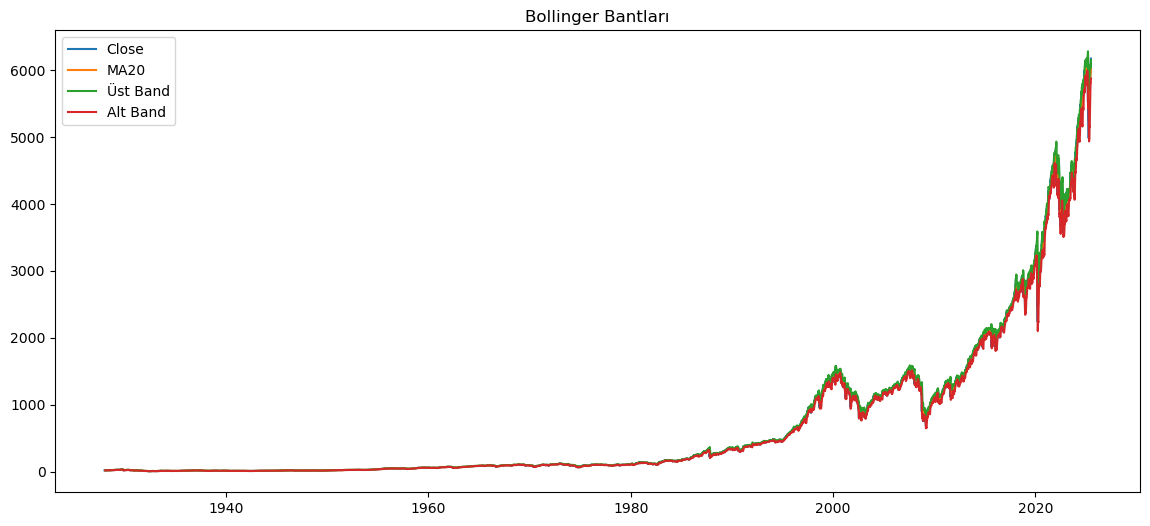

In [18]:
plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close")
plt.plot(df["MA20"], label="MA20")
plt.plot(df["BB_upper"], label="Üst Band")
plt.plot(df["BB_lower"], label="Alt Band")
plt.fill_between(df.index, df["BB_upper"], df["BB_lower"], color='gray', alpha=0.1)
plt.title("Bollinger Bantları")
plt.legend()
plt.show()


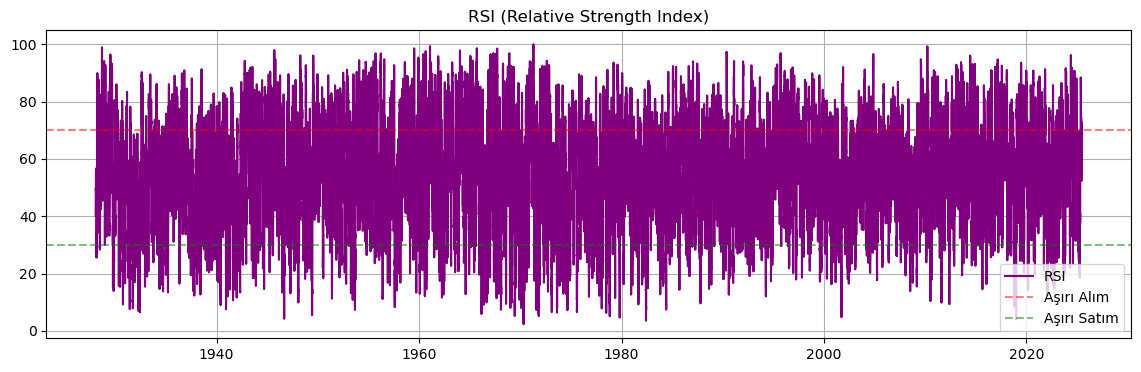

In [20]:
delta = df["Close"].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))


plt.figure(figsize=(14,4))
plt.plot(df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="--", color="red", alpha=0.5, label="Aşırı Alım")
plt.axhline(30, linestyle="--", color="green", alpha=0.5, label="Aşırı Satım")
plt.title("RSI (Relative Strength Index)")
plt.legend()
plt.grid()
plt.show()

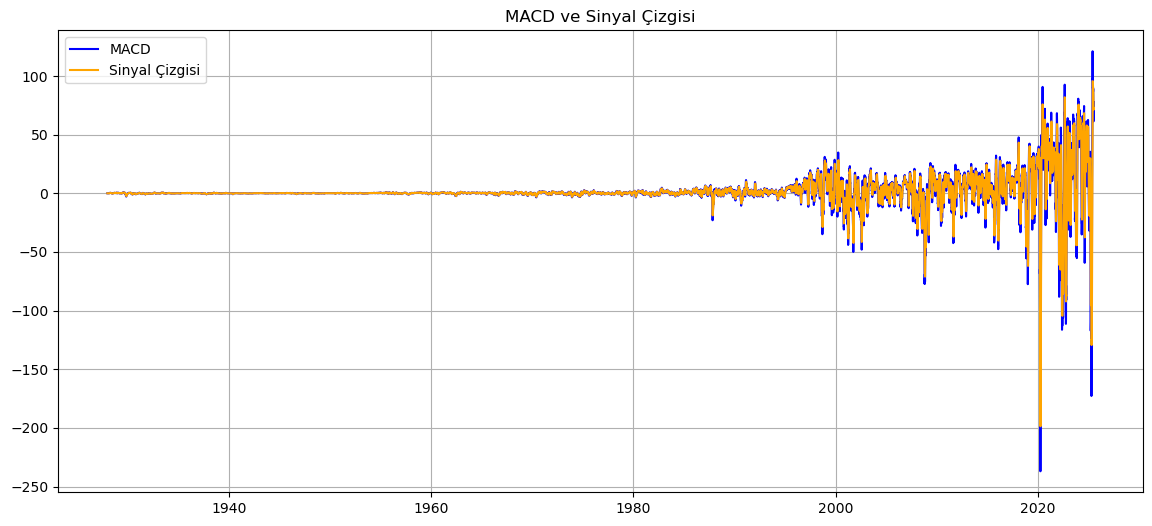

In [21]:
ema12 = df["Close"].ewm(span=12, adjust=False).mean()
ema26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = ema12 - ema26
df["Signal Line"] = df["MACD"].ewm(span=9, adjust=False).mean()


plt.figure(figsize=(14,6))
plt.plot(df["MACD"], label="MACD", color="blue")
plt.plot(df["Signal Line"], label="Sinyal Çizgisi", color="orange")
plt.title("MACD ve Sinyal Çizgisi")
plt.legend()
plt.grid()
plt.show()

In [24]:
monthly_summary = df.resample("ME").agg({
    "Open": "first",
    "Close": "last",
    "High": "max",
    "Low": "min",
    "Volume": "sum"
})


monthly_summary["Monthly Return (%)"] = monthly_summary["Close"].pct_change() * 100

monthly_summary.tail(12)  

,Open,Close,High,Low,Volume,Monthly Return (%)
Date,,,,,,
2024-07-31,5471.080078,5522.299805,5669.669922,5390.950195,80160390000,1.132132
2024-08-31,5537.839844,5648.399902,5651.620117,5119.259766,81097300000,2.283471
2024-09-30,5623.890137,5762.479980,5767.370117,5402.620117,79564830000,2.019688
2024-10-31,5757.729980,5705.450195,5878.459961,5674.000000,82412430000,-0.989674
2024-11-30,5723.220215,6032.379883,6044.169922,5696.509766,84101980000,5.730130
2024-12-31,6040.109863,5881.629883,6099.970215,5832.299805,86064900000,-2.499014
2025-01-31,5903.259766,6040.529785,6128.180176,5773.310059,88639380000,2.701630
2025-02-28,5969.649902,5954.500000,6147.430176,5837.660156,92317000000,-1.424209
2025-03-31,5968.330078,5611.850098,5986.089844,5488.729980,111387270000,-5.754470


In [26]:
monthly_summary["Average Price"] = df["Close"].resample("ME").mean()

In [28]:
annual_summary = df.resample("YE").agg({
    "Open": "first",
    "Close": "last",
    "High": "max",
    "Low": "min",
    "Volume": "sum"
})


annual_summary["Annual Return (%)"] = annual_summary["Close"].pct_change() * 100


annual_summary["Average Price"] = df["Close"].resample("YE").mean()
annual_summary["Volatility"] = df["Close"].resample("YE").std()

annual_summary

,Open,Close,High,Low,Volume,Annual Return (%),Average Price,Volatility
Date,,,,,,,,
1927-12-31,17.660000,17.660000,17.660000,17.660000,0,NaN,17.660000,NaN
1928-12-31,17.760000,24.350000,24.350000,16.950001,0,37.882223,19.937200,1.896299
1929-12-31,24.809999,21.450001,31.860001,17.660000,0,-11.909649,26.123936,3.147679
1930-12-31,21.180000,15.340000,25.920000,14.440000,0,-28.484850,21.033626,2.980226
1931-12-31,15.850000,8.120000,18.170000,7.720000,0,-47.066494,13.631071,2.823958
...,...,...,...,...,...,...,...,...
2021-12-31,3764.610107,4766.180176,4808.930176,3662.709961,1113119260000,26.892739,4273.385635,287.443815
2022-12-31,4778.140137,3839.500000,4818.620117,3491.580078,1159048490000,-19.442827,4098.514748,291.830195
2023-12-31,3853.290039,4769.830078,4793.299805,3794.330078,1003432190000,24.230501,4283.729439,230.258384


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

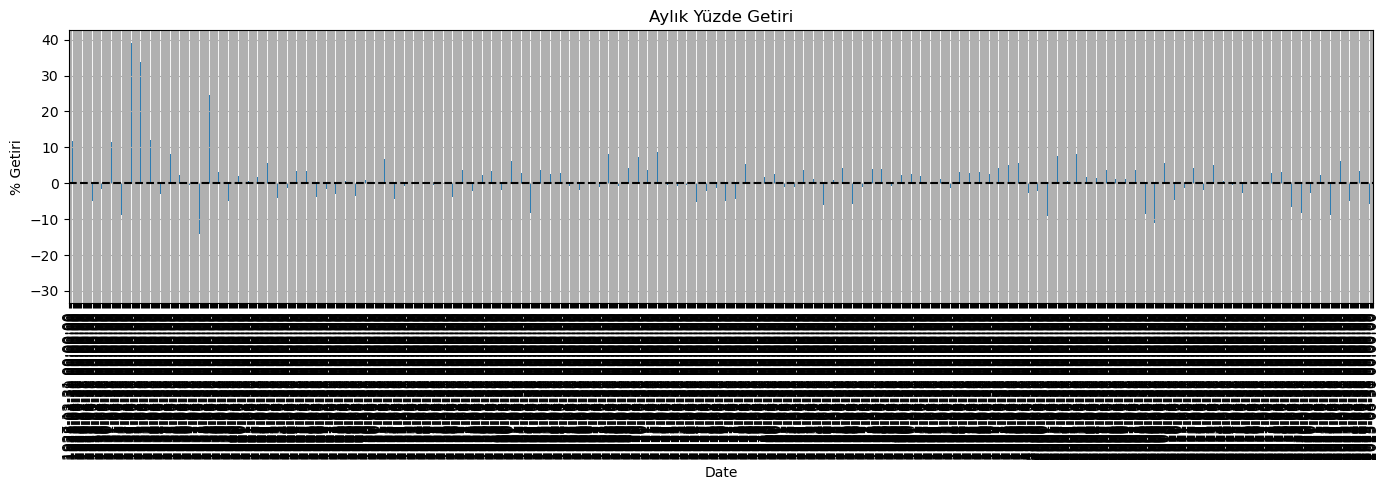

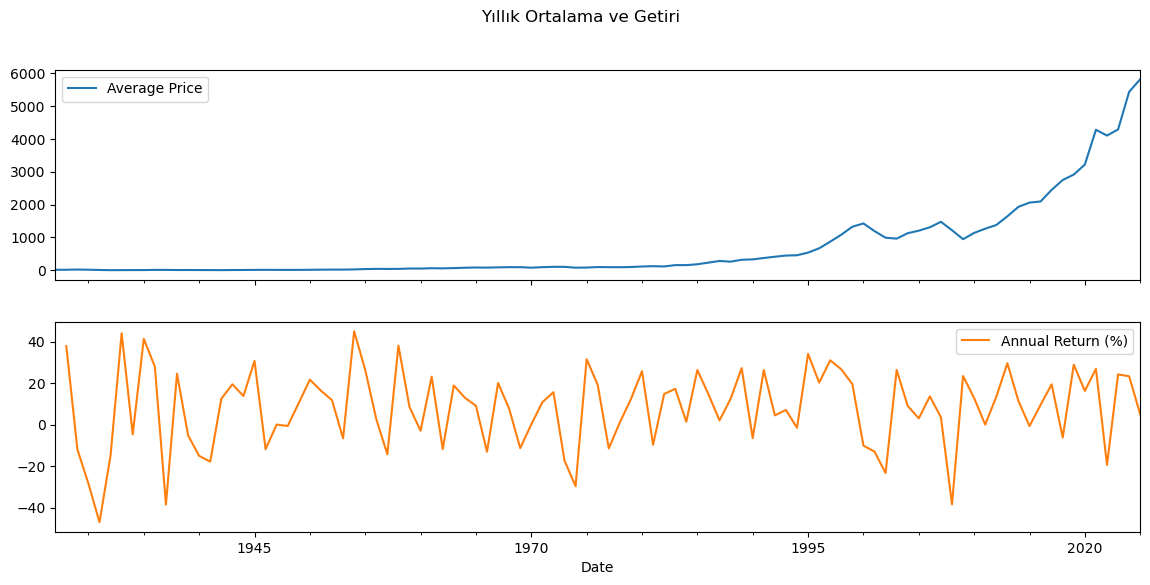

In [29]:
monthly_summary["Monthly Return (%)"].plot(kind='bar', figsize=(14,5), title="Aylık Yüzde Getiri")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("% Getiri")
plt.grid()
plt.tight_layout()
annual_summary[["Average Price", "Annual Return (%)"]].plot(subplots=True, figsize=(14,6), title="Yıllık Ortalama ve Getiri")

In [30]:
df['MACD_Signal'] = 0
df.loc[df['MACD'] > df['Signal Line'], 'MACD_Signal'] = 1  
df.loc[df['MACD'] < df['Signal Line'], 'MACD_Signal'] = -1  

<Axes: title={'center': 'MACD Tabanlı Strateji Getirisi (%)'}, xlabel='Date'>

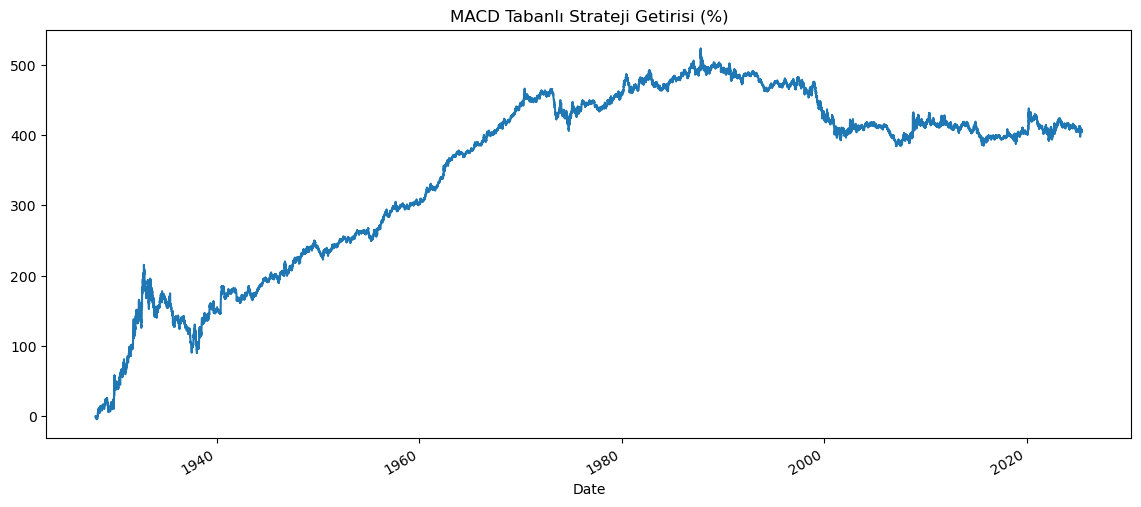

In [31]:
df['MACD_Return'] = df['Daily Return'] * df['MACD_Signal'].shift(1)
(df['MACD_Return'].cumsum() * 100).plot(figsize=(14,6), title='MACD Tabanlı Strateji Getirisi (%)')

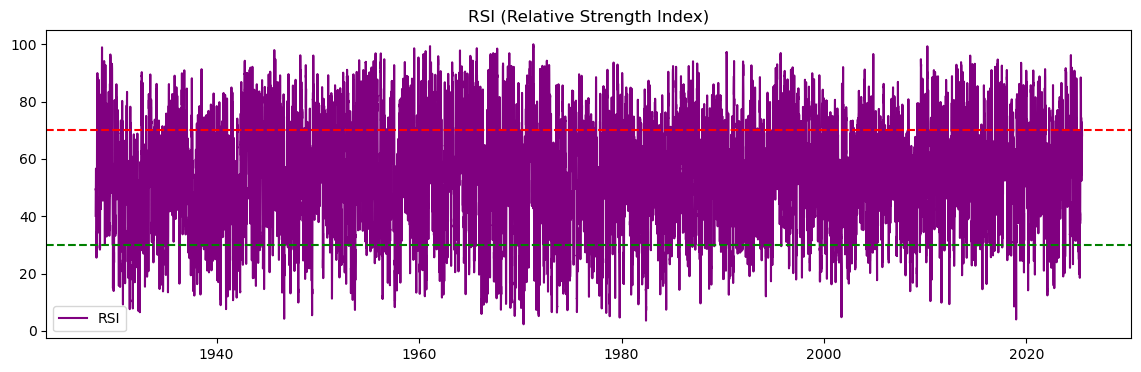

In [32]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(14,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI (Relative Strength Index)')
plt.legend()
plt.show()

In [33]:
df['RSI_Signal'] = 0
df.loc[df['RSI'] > 70, 'RSI_Signal'] = -1
df.loc[df['RSI'] < 30, 'RSI_Signal'] = 1

<Axes: title={'center': 'RSI Tabanlı Strateji Getirisi (%)'}, xlabel='Date'>

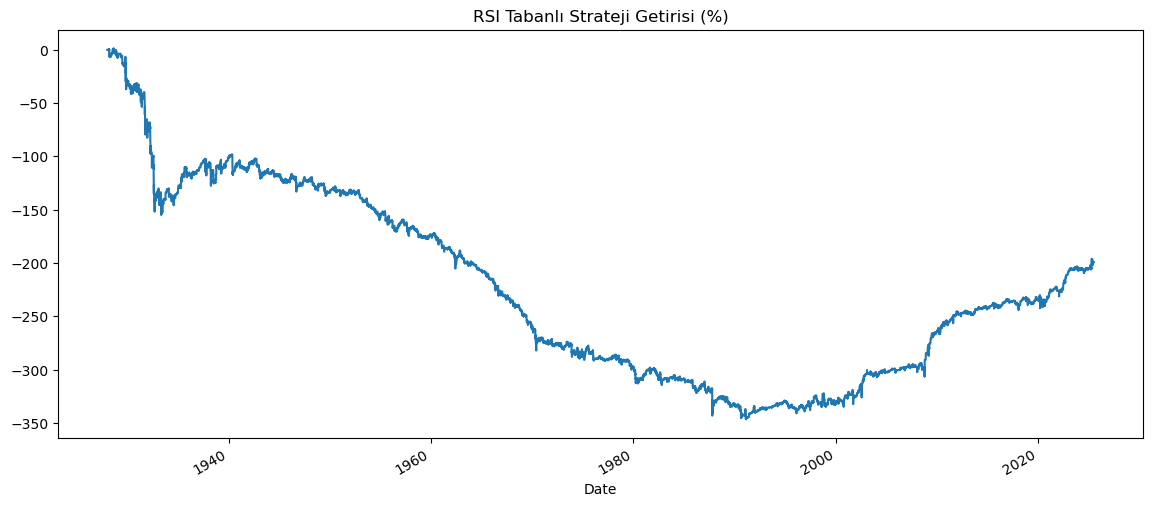

In [34]:
df['RSI_Return'] = df['Daily Return'] * df['RSI_Signal'].shift(1)
(df['RSI_Return'].cumsum() * 100).plot(figsize=(14,6), title='RSI Tabanlı Strateji Getirisi (%)')

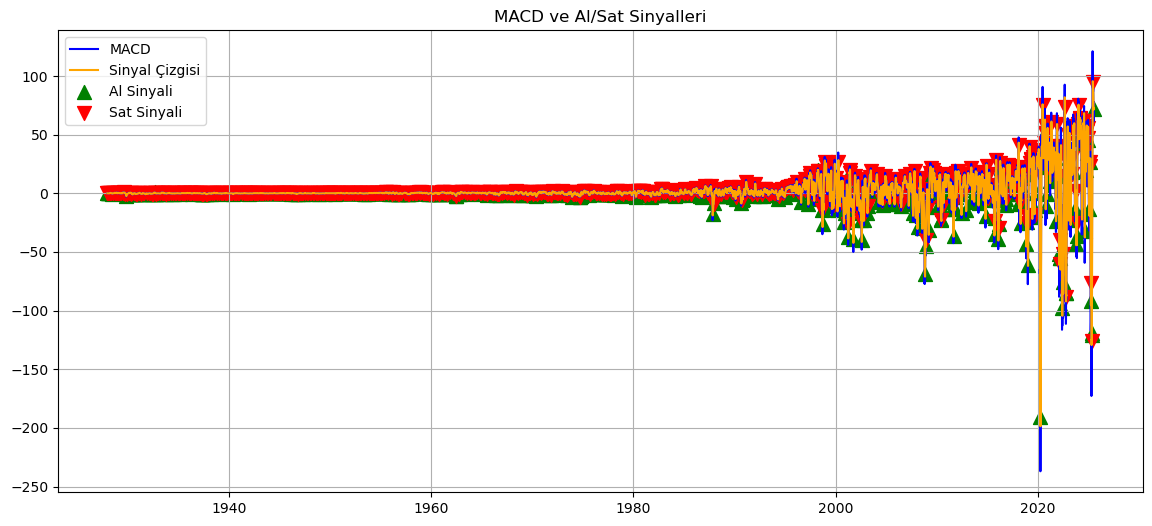

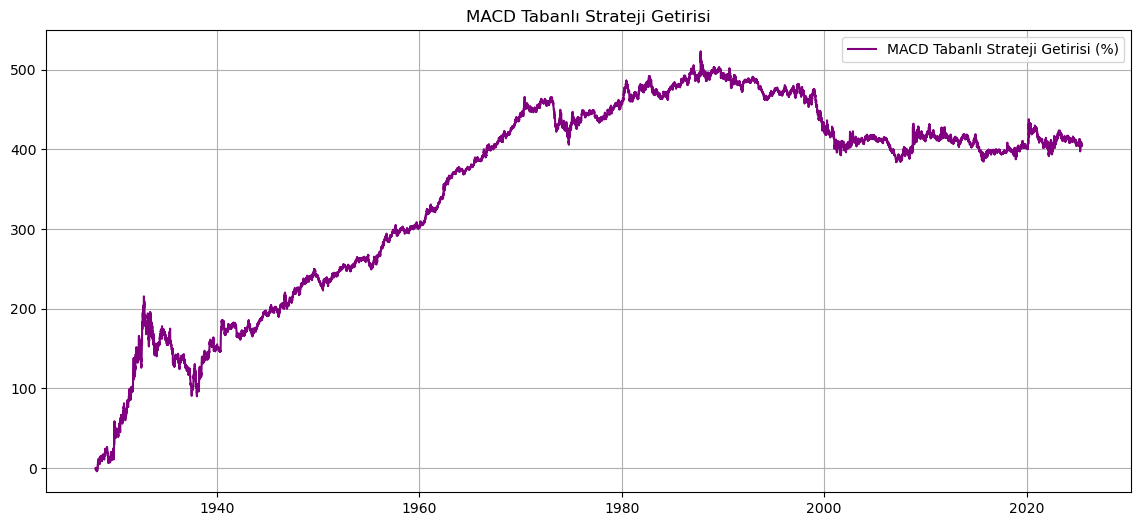

In [35]:
plt.figure(figsize=(14,6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal Line'], label='Sinyal Çizgisi', color='orange')
buy_signals = df[(df['MACD_Signal'] == 1) & (df['MACD_Signal'].shift(1) != 1)]
sell_signals = df[(df['MACD_Signal'] == -1) & (df['MACD_Signal'].shift(1) != -1)]
plt.scatter(buy_signals.index, buy_signals['MACD'], marker='^', color='green', label='Al Sinyali', s=100)
plt.scatter(sell_signals.index, sell_signals['MACD'], marker='v', color='red', label='Sat Sinyali', s=100)
plt.title('MACD ve Al/Sat Sinyalleri')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(14,6))
plt.plot((df['MACD_Return'].cumsum()) * 100, label='MACD Tabanlı Strateji Getirisi (%)', color='purple')
plt.title('MACD Tabanlı Strateji Getirisi')
plt.legend()
plt.grid()
plt.show()

In [36]:
def sharpe_ratio(returns, risk_free_rate=0):
    return (returns.mean() - risk_free_rate) / returns.std() * np.sqrt(252)

macd_sharpe = sharpe_ratio(df['MACD_Return'].dropna())
rsi_sharpe = sharpe_ratio(df['RSI_Return'].dropna())
print(f"MACD Sharpe Oranı: {macd_sharpe:.2f}")
print(f"RSI Sharpe Oranı: {rsi_sharpe:.2f}")

MACD Sharpe Oranı: 0.22
RSI Sharpe Oranı: -0.19


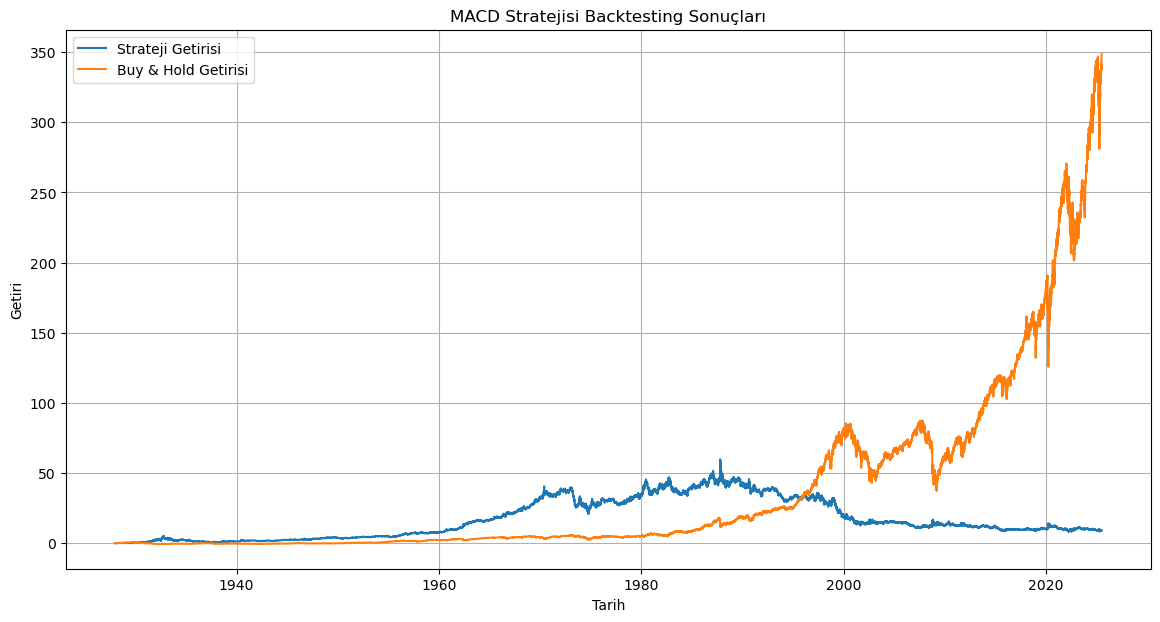

In [38]:
df['Position'] = 0
df.loc[df['MACD'] > df['Signal Line'], 'Position'] = 1
df.loc[df['MACD'] < df['Signal Line'], 'Position'] = -1


df['Trade'] = df['Position'].diff().abs()


trade_cost = 0.001


df['Strategy_Return'] = df['Daily Return'] * df['Position'].shift(1)


df.loc[df['Trade'] == 1, 'Strategy_Return'] -= trade_cost


df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod() - 1
df['Cumulative_Buy_and_Hold'] = (1 + df['Daily Return']).cumprod() - 1

plt.figure(figsize=(14,7))
plt.plot(df.index, df['Cumulative_Strategy_Return'], label='Strateji Getirisi')
plt.plot(df.index, df['Cumulative_Buy_and_Hold'], label='Buy & Hold Getirisi')
plt.title('MACD Stratejisi Backtesting Sonuçları')
plt.xlabel('Tarih')
plt.ylabel('Getiri')
plt.legend()
plt.grid()
plt.show()

In [39]:
def backtest_macd(df, short_span, long_span, signal_span, trade_cost=0.001):
    df_copy = df.copy()
    
    
    ema_short = df_copy['Close'].ewm(span=short_span, adjust=False).mean()
    ema_long = df_copy['Close'].ewm(span=long_span, adjust=False).mean()
    
    df_copy['MACD'] = ema_short - ema_long
    df_copy['Signal Line'] = df_copy['MACD'].ewm(span=signal_span, adjust=False).mean()
    
   
    df_copy['Position'] = 0
    df_copy.loc[df_copy['MACD'] > df_copy['Signal Line'], 'Position'] = 1
    df_copy.loc[df_copy['MACD'] < df_copy['Signal Line'], 'Position'] = -1
    
    
    df_copy['Trade'] = df_copy['Position'].diff().abs()
    
    
    df_copy['Daily Return'] = df_copy['Close'].pct_change()
    
    
    df_copy['Strategy_Return'] = df_copy['Daily Return'] * df_copy['Position'].shift(1)
    df_copy.loc[df_copy['Trade'] == 1, 'Strategy_Return'] -= trade_cost
    
    
    cumulative_return = (1 + df_copy['Strategy_Return'].dropna()).prod() - 1
    trade_count = df_copy['Trade'].sum()
    
    return cumulative_return, trade_count

In [40]:
short_spans = [8, 12, 15]
long_spans = [21, 26, 30]
signal_spans = [5, 9, 12]

results = []

for short in short_spans:
    for long in long_spans:
        if long > short:
            for signal in signal_spans:
                ret, trades = backtest_macd(df, short, long, signal)
                results.append({
                    'Short EMA': short,
                    'Long EMA': long,
                    'Signal EMA': signal,
                    'Cumulative Return': ret,
                    'Trade Count': trades
                })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Cumulative Return', ascending=False))

    Short EMA  Long EMA  Signal EMA  Cumulative Return  Trade Count
24         15        30           5          56.564407       4209.0
0           8        21           5          33.111183       5757.0
5           8        26          12          21.368204       3885.0
6           8        30           5          18.591528       5497.0
3           8        26           5          18.065993       5565.0
21         15        26           5          12.999491       4401.0
9          12        21           5          10.998818       5037.0
15         12        30           5          10.154713       4649.0
7           8        30           9           9.230770       4285.0
8           8        30          12           9.149070       3821.0
13         12        26           9           8.937055       3749.0
12         12        26           5           8.602937       4757.0
19         15        21           9           7.565836       3685.0
10         12        21           9           7.

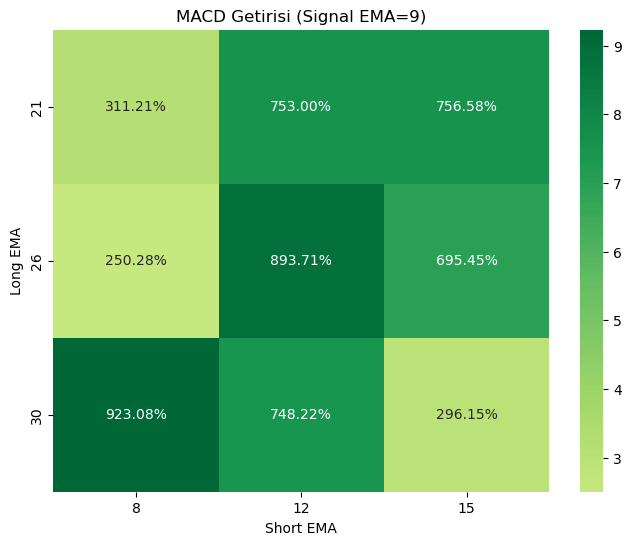

In [41]:
subset = results_df[results_df['Signal EMA'] == 9]

pivot_table = subset.pivot(index='Long EMA', columns='Short EMA', values='Cumulative Return')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap='RdYlGn', center=0)
plt.title('MACD Getirisi (Signal EMA=9)')
plt.xlabel('Short EMA')
plt.ylabel('Long EMA')
plt.show()

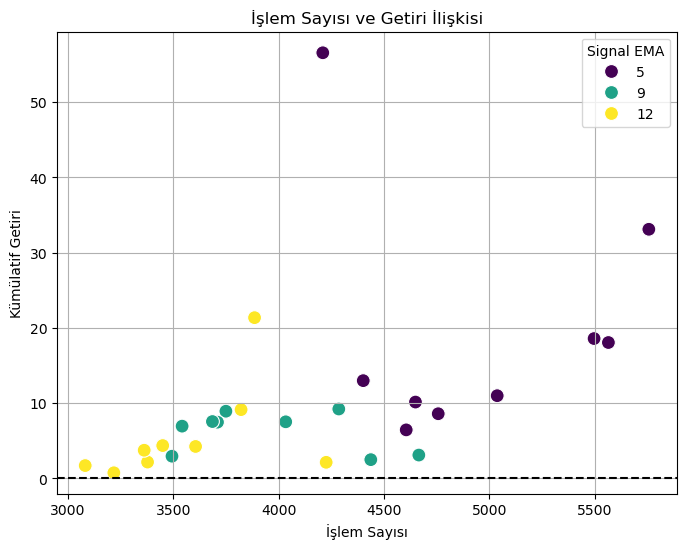

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=results_df, x='Trade Count', y='Cumulative Return', hue='Signal EMA', palette='viridis', s=100)
plt.title('İşlem Sayısı ve Getiri İlişkisi')
plt.xlabel('İşlem Sayısı')
plt.ylabel('Kümülatif Getiri')
plt.axhline(0, color='black', linestyle='--')
plt.grid()
plt.show()

In [43]:
best = results_df.loc[results_df['Cumulative Return'].idxmax()]
print("En iyi parametreler:\n", best)

En iyi parametreler:
 Short EMA              15.000000
Long EMA               30.000000
Signal EMA              5.000000
Cumulative Return      56.564407
Trade Count          4209.000000
Name: 24, dtype: float64


In [44]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()
df['BB_upper'] = df['MA20'] + (2 * df['STD20'])
df['BB_lower'] = df['MA20'] - (2 * df['STD20'])

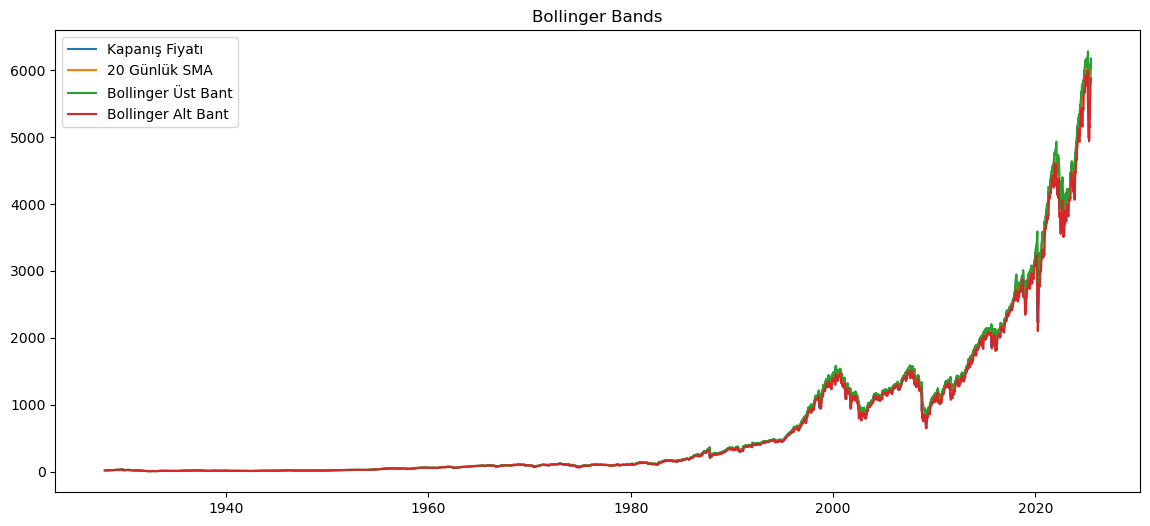

In [45]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Kapanış Fiyatı')
plt.plot(df['MA20'], label='20 Günlük SMA')
plt.plot(df['BB_upper'], label='Bollinger Üst Bant')
plt.plot(df['BB_lower'], label='Bollinger Alt Bant')
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [46]:
low_14 = df['Low'].rolling(window=14).min()
high_14 = df['High'].rolling(window=14).max()

df['%K'] = 100 * ((df['Close'] - low_14) / (high_14 - low_14))
df['%D'] = df['%K'].rolling(window=3).mean()

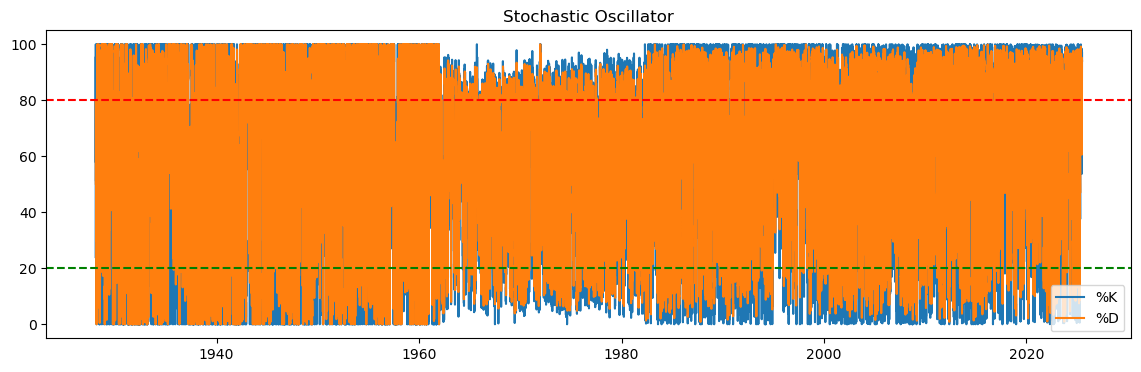

In [47]:
plt.figure(figsize=(14,4))
plt.plot(df['%K'], label='%K')
plt.plot(df['%D'], label='%D')
plt.axhline(80, color='red', linestyle='--')
plt.axhline(20, color='green', linestyle='--')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

In [49]:
df['BB_Signal'] = 0
df.loc[df['Close'] >= df['BB_upper'], 'BB_Signal'] = -1
df.loc[df['Close'] <= df['BB_lower'], 'BB_Signal'] = 1

In [50]:
df['Stoch_Signal'] = 0
df.loc[(df['%K'] > df['%D']) & (df['%K'].shift(1) <= df['%D'].shift(1)), 'Stoch_Signal'] = 1
df.loc[(df['%K'] < df['%D']) & (df['%K'].shift(1) >= df['%D'].shift(1)), 'Stoch_Signal'] = -1

In [55]:
trade_cost = 0.001  # İşlem maliyeti

# Bollinger Bands Stratejisi
df['BB_Position'] = df['BB_Signal'].replace(0, np.nan, inplace=False).ffill()
df['BB_Trade'] = df['BB_Position'].diff().abs()
df['BB_Strategy_Return'] = df['Daily Return'] * df['BB_Position']
df.loc[df['BB_Trade'] == 1, 'BB_Strategy_Return'] -= trade_cost
df['BB_Cumulative_Return'] = (1 + df['BB_Strategy_Return']).cumprod() - 1

# Stochastic Stratejisi
df['Stoch_Position'] = df['Stoch_Signal'].replace(0, np.nan, inplace=False).ffill()
df['Stoch_Trade'] = df['Stoch_Position'].diff().abs()
df['Stoch_Strategy_Return'] = df['Daily Return'] * df['Stoch_Position']
df.loc[df['Stoch_Trade'] == 1, 'Stoch_Strategy_Return'] -= trade_cost
df['Stoch_Cumulative_Return'] = (1 + df['Stoch_Strategy_Return']).cumprod() - 1

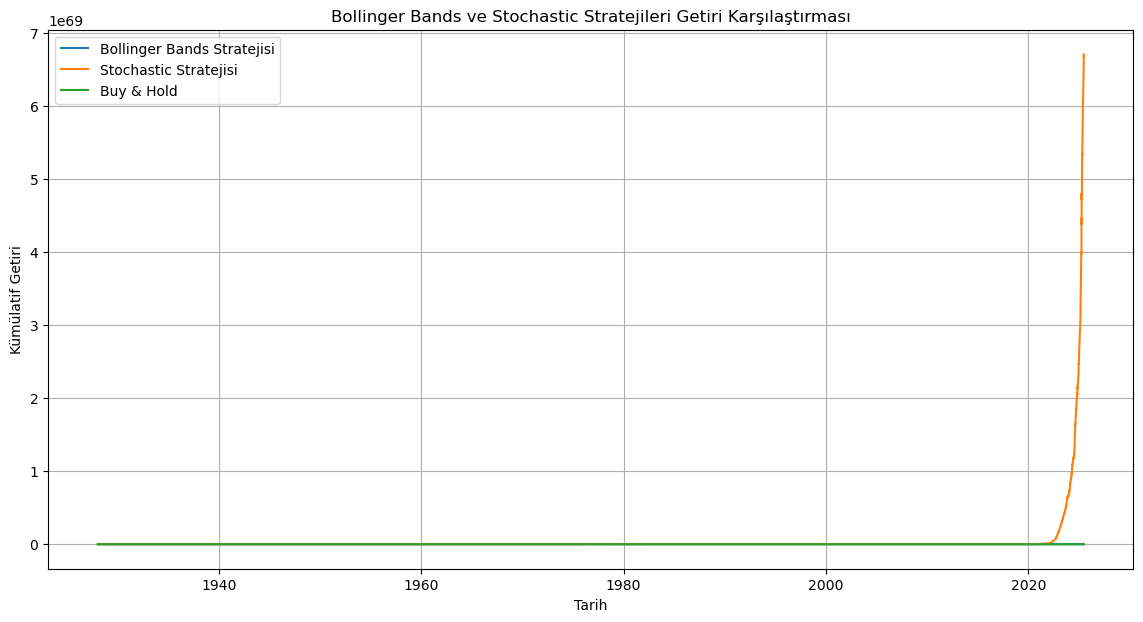

In [56]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['BB_Cumulative_Return'], label='Bollinger Bands Stratejisi')
plt.plot(df.index, df['Stoch_Cumulative_Return'], label='Stochastic Stratejisi')
plt.plot(df.index, (1 + df['Daily Return']).cumprod() - 1, label='Buy & Hold')
plt.title('Bollinger Bands ve Stochastic Stratejileri Getiri Karşılaştırması')
plt.xlabel('Tarih')
plt.ylabel('Kümülatif Getiri')
plt.legend()
plt.grid()
plt.show()